# **Deep Learning Programming with Python**
### Week4: Machine Learning Basics with Scikit-Learn (2)

**Acknowledgement**

Some descriptions & codes from the below resources:

1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.askpython.com/python/examples/principal-component-analysis
3. https://devopedia.org/principal-component-analysis
4. https://colab.research.google.com/github/andy6804tw/2021-13th-ironman/blob/main/11.SVM/11.1.SVM(Classification-iris).ipynb#scrollTo=vZLBnRyHxCHK
----


# Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Gradient Descent

* Batch Gradient Descent (= Gradient Descent = Full Gradient Descent)
* Stochastic Gradient Descent
* Mini-batch Gradient Descent

### - Recap: Linear regression using the Normal Equation

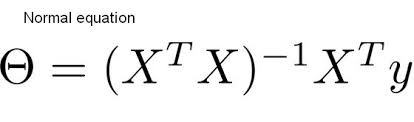

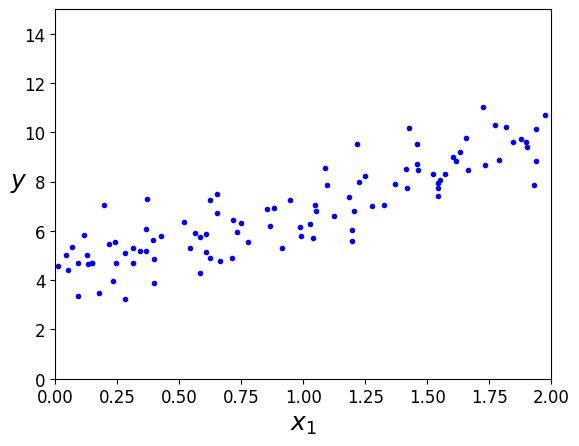

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal equation
print (f"theta_best:\n{theta_best}")
plt.show()

theta_best:
[[4.21509616]
 [2.77011339]]


### Linear regression using batch gradient descent (full gradient descent)

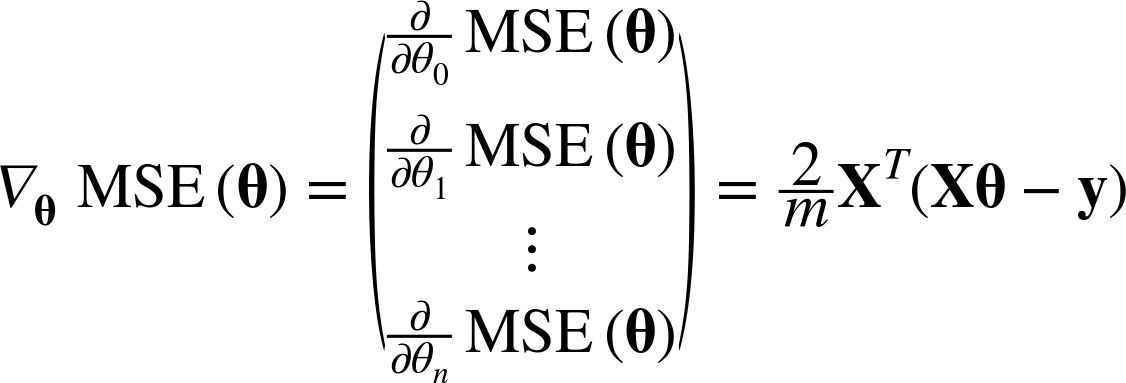

In [5]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # a gredient vector of the cost function (MSE)
    theta = theta - eta * gradients #gredient descent step
    #print (f"new theta:\n{theta}")

print (f"theta:\n{theta}")

theta:
[[4.21509616]
 [2.77011339]]


In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 5:
            y_predict = X_new_b.dot(theta)
            style = "g-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            plt.text(X_new[0], y_predict[0], str(iteration), fontsize=15, c='g')
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # compute gradient based on the cost function (MSE)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

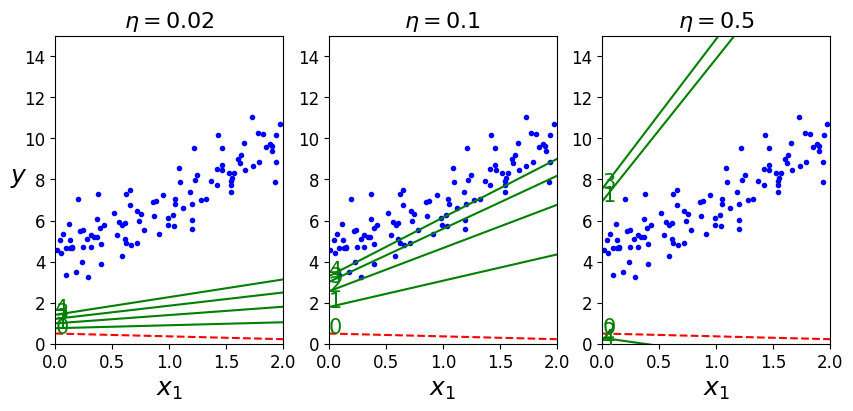

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### Linear regression using stochastic gradient descent (using a single sample to compute the gradient)

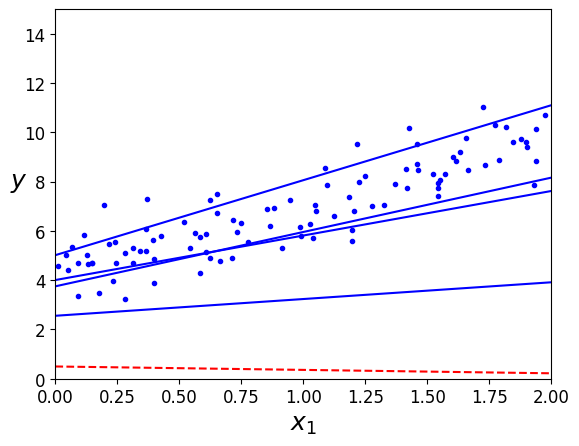

In [26]:
theta_path_sgd = []
m = len(X_b) #100
#print(m)
np.random.seed(42)

n_epochs = 100
t0, t1 = 15, 50  # learning schedule hyperparameters

# to gradually reduce the learning rate
def learning_schedule(t):
    #return t0 / (t1) #lr = 0.3 (fixed)
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 5:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        # pict a random instance in the training set at every steop
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
#save_fig("sgd_plot")
plt.show()

### Linear regression using mini-batch gradient descent (using some samples to compute the gradient)

In [27]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

# check the theta
print (f"theta:\n{theta}")

theta:
[[4.25214635]
 [2.7896408 ]]


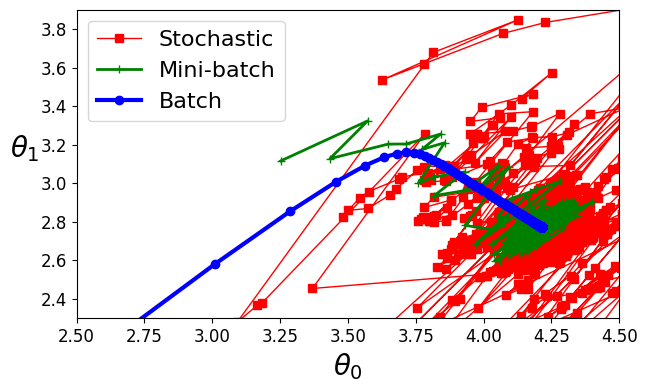

In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
#save_fig("gradient_descent_paths_plot")
plt.show()

# Logistic Regression Classifier in Python - Basic Introduction

In logistic regression... basically, you are performing linear regression but applying a sigmoid function for the outcome.

#### Sigmoid  / Logistic Function

$\hat y =1 / 1 + e^{-z}$

#### Properties of Logistic Regression

* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)

#### Advantages
* Straight forward, easy to implement, doesn't require high compute power, easy to interpret, used widely.
* Doesn't require feature scaling and provides a probability score for observations.

#### Disadvantages
* Not able to handle a large number of category features/variables.
* Vulnerable to overfitting.

### Logistic Regression 3-class Classifier

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()

In [30]:
# Split data into train test sets
from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target

# stratify => to make balanced bins
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y)

print(y_train.shape) # 150 * 0.7
print(y_test.shape) # 150 * 0.3
print('y label count:', np.bincount(y))
print('y_train label count:', np.bincount(y_train))
print('y_test label count:', np.bincount(y_test))

(105,)
(45,)
y label count: [50 50 50]
y_train label count: [35 35 35]
y_test label count: [15 15 15]


### Standardization

**Standardization** of datasets is a **common requirement for many machine learning estimators** implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with **zero mean and unit variance**.

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

https://scikit-learn.org/stable/modules/preprocessing.html

In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#print(X_train_std.shape)
print(X_train[:5, :])
print(X_train_std[:5, :])

[[5.2 3.4 1.4 0.2]
 [5.4 3.4 1.7 0.2]
 [6.7 3.  5.2 2.3]
 [5.8 2.7 3.9 1.2]
 [6.9 3.1 5.4 2.1]]
[[-0.76886385  0.74507045 -1.33311117 -1.31758267]
 [-0.53787471  0.74507045 -1.16527343 -1.31758267]
 [ 0.96355469 -0.15935033  0.7928335   1.44145796]
 [-0.07589643 -0.83766591  0.06553664 -0.0037538 ]
 [ 1.19454383  0.06675487  0.90472532  1.17869219]]


In [32]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

# start training
# model is learning the relationship between digits (x_train) and labels (y_train)
logisticRegr.fit(X_train_std, y_train)

LogisticRegression()

Make predictions on entire test data

In [33]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test_std, y_test)
print(score)
predictions = logisticRegr.predict(X_test_std)


1.0


### Confusion Matrix

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


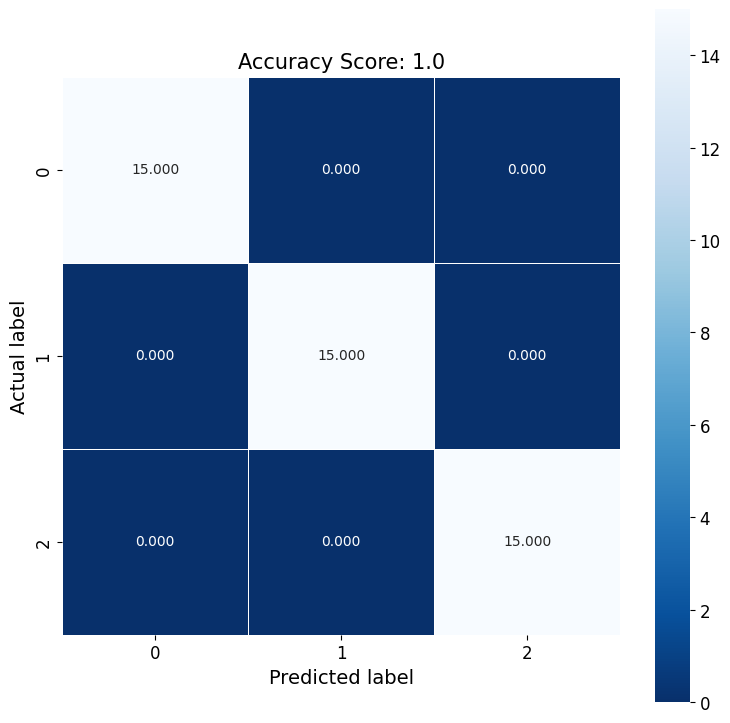

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [36]:
# Checkout the predictions of our model given some samples from the test set

print ("The model's predictions: ", logisticRegr.predict_proba(X_test_std[:5, :]).argmax(axis=1))
print ("GT Labels ", y_test[:5])

The model's predictions:  [1 2 1 2 0]
GT Labels  [1 2 1 2 0]
